In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import random 
import numpy as np
import matplotlib.pyplot as plt

In [76]:
pokemons = pd.read_csv('boss1.csv')
pokemons.head()

,Unnamed: 0.1,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,5,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [77]:
pokemons.value_counts('generation')

generation
1    172
5    150
3    130
4    100
2     94
8     82
6     75
7     69
Name: count, dtype: int64

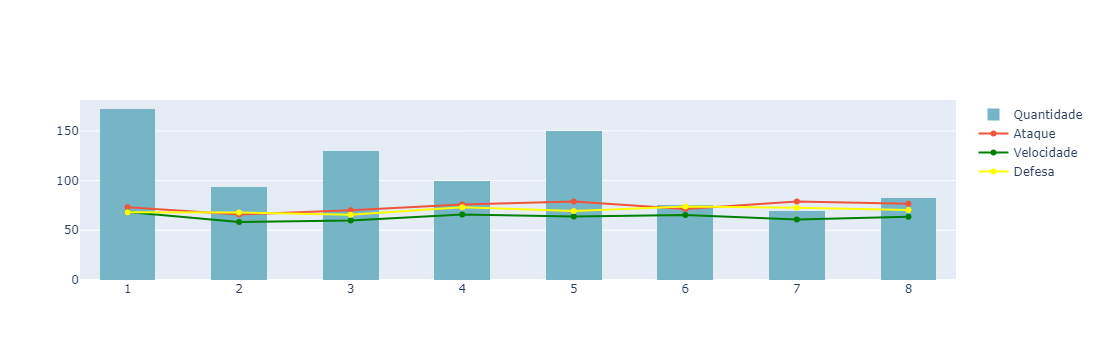

In [78]:
pokemons_by_generation = pokemons.groupby("generation").agg({"attack": "mean", "speed": "mean", "defense": "mean"})
pokemons_by_generation["attack"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=pokemons["generation"], nbinsx=15, name="Quantidade", marker_color="#76b5c5"))

fig.add_trace(go.Scatter(x=pokemons_by_generation.index, y=pokemons_by_generation["attack"],
                    mode='lines+markers',
                    name='Ataque'))
fig.add_trace(go.Scatter(x=pokemons_by_generation.index, y=pokemons_by_generation["speed"],
                    mode='lines+markers',
                    name='Velocidade',
                    marker_color="green"))
fig.add_trace(go.Scatter(x=pokemons_by_generation.index, y=pokemons_by_generation["defense"],
                    mode='lines+markers',
                    name='Defesa',
                    marker_color="yellow"))

fig.show()

- Análise: A média do ataque teve uma tendência de crescimento a partir da segunda geração, e teve o ápice na quinta geração, em seguinda teve uma queda na sexta e voltou bruscamente na sétima.
A segunda e sexta geração são as únicas cuja defesa média ultrapassou o ataque.


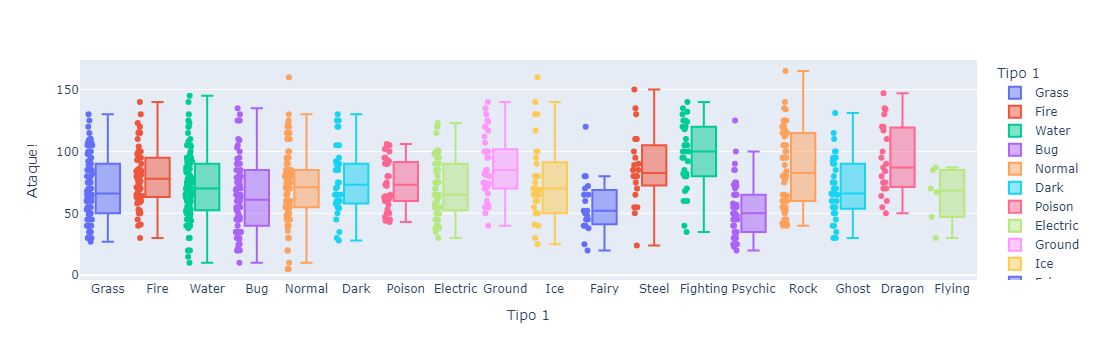

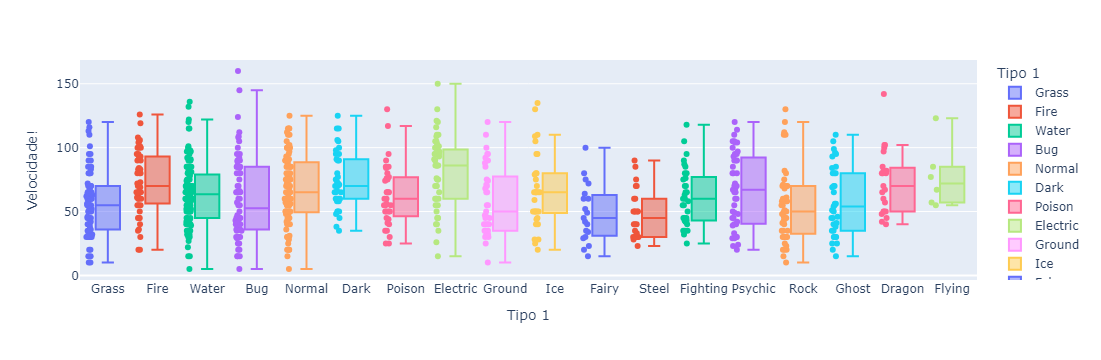

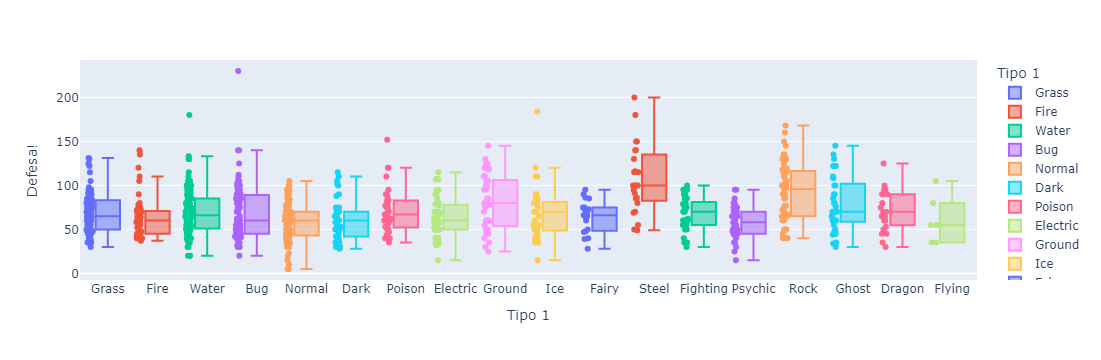

In [79]:
#Boxsplot
pokeataque = px.box(pokemons, x="type_1", y="attack", points="all", color='type_1',hover_data='name', labels={"type_1":"Tipo 1", "attack":"Ataque!",})
pokeataque.show()

pokespeed = px.box(pokemons, x="type_1", y="speed", points="all", color='type_1',hover_data='name', labels={"type_1":"Tipo 1", "speed":"Velocidade!",})
pokespeed.show()

pokedefense = px.box(pokemons, x="type_1", y="defense", points="all", color='type_1',hover_data='name',labels={"type_1":"Tipo 1", "defense":"Defesa!",})
pokedefense.show()



## Análise:
Em minha analise notei que o pokemon do tipo pedra Rampardos, com um ataque de 160 pontos, em seguida verifiquei os mais fracos  onde encontrei dois com a mesma pontuação seriam eles o Happiny e a Chansey ambos com 5 de ataque do tipo Normal.

A respeito da velocidade o pokemon Ninjask se destaca com uma velocidade de 160d o tipo Inseto, e o oposto dele vemos  3 tipos de pokemons, o Pyukumunuku, Shuckle e o Munchlax respectivamente dos tipos Água, Inseto e Normal.

Por último temos a defesa onde curiosamente do tipo Inseto, o Shuckle se destaca  com  incriveis 230 pontos de defesa, o que idenficamos como um outlier pois está distante da média da defesa dos pokemons que seria 60 pontos e o menos defensivo que idenficamos são Chansey e Happiny do tipo Normal.

### Existe algum tipo notavelmente equilibrado ou forte em algum atributo?
Na defesa percebos que o tipo Steel lidera, quando falamos sobre equilibrio o tipo Water se destaca.

In [80]:
#Comparação de Ataque  do tipo com todos os pokemons.
pokemonmediaA = pokemons.groupby('type_1')['attack'].mean()
print(pokemonmediaA)

pokemonmediaallA = pokemons['attack'].mean()
print(f'média  de attack de todos pokemons {pokemonmediaallA}')

#Comparação de Velocidade  do tipo com todos os pokemons.
pokemonmediaV = pokemons.groupby('type_1')['speed'].mean()
print(pokemonmediaA)

pokemonmediaallV = pokemons['speed'].mean()
print(f'média  de speed de todos pokemons {pokemonmediaallV}')
#Comparação de Defesa  do tipo com todos os pokemons.
pokemonmediaD = pokemons.groupby('type_1')['defense'].mean()
print(pokemonmediaD)

pokemonmediaallD = pokemons['defense'].mean()
print(f'média  de defesa de todos pokemons {pokemonmediaallD}')

type_1
Bug         63.797297
Dark        76.763158
Dragon      93.173913
Electric    70.538462
Fairy       56.157895
Fighting    97.515152
Fire        79.363636
Flying      64.333333
Ghost       70.054054
Grass       70.487805
Ground      88.081081
Ice         75.878788
Normal      72.180952
Poison      74.285714
Psychic     52.723404
Rock        87.211538
Steel       86.791667
Water       71.516667
Name: attack, dtype: float64
média  de attack de todos pokemons 73.94151376146789
type_1
Bug         63.797297
Dark        76.763158
Dragon      93.173913
Electric    70.538462
Fairy       56.157895
Fighting    97.515152
Fire        79.363636
Flying      64.333333
Ghost       70.054054
Grass       70.487805
Ground      88.081081
Ice         75.878788
Normal      72.180952
Poison      74.285714
Psychic     52.723404
Rock        87.211538
Steel       86.791667
Water       71.516667
Name: attack, dtype: float64
média  de speed de todos pokemons 63.684633027522935
type_1
Bug          69.324324


In [24]:
unique_types = pokemons['type_1'].unique()

selected_types = random.sample(list(unique_types), 10)

selected_pokemons = pd.DataFrame()

for p_type in selected_types:
    type_pokemons = pokemons[pokemons['type_1'] == p_type]
    selected_pokemons = pd.concat([selected_pokemons, type_pokemons.sample(3)], ignore_index=True)

pesos = {
 'speed': 2.0,
 'defense': 1.0,
 'attack': 2.0,
}

selected_pokemons['metrica'] = selected_pokemons['attack'] * pesos['attack']  + selected_pokemons['defense'] * pesos['defense'] + selected_pokemons['speed'] * pesos['speed']

selected_pokemons = selected_pokemons.rename(columns={'against_fight': 'against_fighting'})

for index, row in selected_pokemons.iterrows():
    for type in selected_pokemons['type_1'].unique():
        selected_pokemons.loc[index,'metrica'] += row[f'against_{type.lower()}']

    selected_pokemons.loc[index,'metrica'] = row['metrica'] / 23


selected_list_pokemons = []
for type in selected_pokemons['type_1'].unique():
    selected_type = selected_pokemons[selected_pokemons['type_1'] == type]
    selected_list_pokemons.append(selected_pokemons.iloc[selected_type['metrica'].idxmax()])


current_team_pokemon = pd.DataFrame(selected_list_pokemons)

current_team_pokemon = current_team_pokemon.sort_values(by="metrica", ascending=False).head(6)

current_team_pokemon.drop(columns=['Unnamed: 0.1','Unnamed: 0','german_name','japanese_name' ])



,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,metrica
29,530,Excadrill,5,Normal,Subterrene Pokémon,2,Ground,Steel,0.7,40.4,...,0.5,0.5,0.50,0.25,1.0,0.5,1.0,0.5,0.5,22.000000
9,521,Unfezant,5,Normal,Proud Pokémon,2,Normal,Flying,1.2,29.0,...,1.0,1.0,0.50,2.00,0.0,1.0,1.0,1.0,1.0,21.565217
6,141,Kabutops,1,Normal,Shellfish Pokémon,2,Rock,Water,1.3,40.5,...,0.5,1.0,1.00,1.00,1.0,1.0,1.0,1.0,1.0,21.521739
3,78,Galarian Rapidash,1,Normal,Unique Horn Pokémon,2,Psychic,Fairy,1.7,80.0,...,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5,20.869565
24,405,Luxray,4,Normal,Gleam Eyes Pokémon,1,Electric,NaN,1.4,42.0,...,0.5,1.0,1.00,1.00,1.0,1.0,1.0,0.5,1.0,19.956522
1,680,Doublade,6,Normal,Sword Pokémon,2,Steel,Ghost,0.8,4.5,...,0.5,0.5,0.25,0.50,2.0,0.5,2.0,0.5,0.5,19.130435


#### Crie um gráfico de dispersão 3D para visualizar attack, defense e speed dos Pokémon
selecionados.

In [81]:
unique_types = pokemons['type_1'].unique()

selected_types = random.sample(list(unique_types), 10)

selected_pokemons = pd.DataFrame()

for p_type in selected_types:
    type_pokemons = pokemons[pokemons['type_1'] == p_type]
    selected_pokemons = pd.concat([selected_pokemons, type_pokemons.sample(3)], ignore_index=True)

pesos = {
 'speed': 2.0,
 'defense': 1.0,
 'attack': 2.0,
}

selected_pokemons['metrica'] = selected_pokemons['attack'] * pesos['attack']  + selected_pokemons['defense'] * pesos['defense'] + selected_pokemons['speed'] * pesos['speed']

selected_pokemons = selected_pokemons.rename(columns={'against_fight': 'against_fighting'})

for index, row in selected_pokemons.iterrows():
    for type in selected_pokemons['type_1'].unique():
        selected_pokemons.loc[index,'metrica'] += row[f'against_{type.lower()}']

    selected_pokemons.loc[index,'metrica'] = row['metrica'] / 23


selected_list_pokemons = []
for type in selected_pokemons['type_1'].unique():
    selected_type = selected_pokemons[selected_pokemons['type_1'] == type]
    selected_list_pokemons.append(selected_pokemons.iloc[selected_type['metrica'].idxmax()])


current_team_pokemon = pd.DataFrame(selected_list_pokemons)

current_team_pokemon = current_team_pokemon.sort_values(by="metrica", ascending=False).head(6)

current_team_pokemon.drop(columns=['Unnamed: 0.1','Unnamed: 0','german_name','japanese_name' ])



,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,metrica
22,277,Swellow,3,Normal,Swallow Pokémon,2,Normal,Flying,0.7,19.8,...,1.0,1.0,0.50,2.00,0.0,1.0,1.0,1.0,1.0,20.869565
13,534,Conkeldurr,5,Normal,Muscular Pokémon,1,Fighting,NaN,1.4,87.0,...,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,20.217391
5,526,Gigalith,5,Normal,Compressed Pokémon,1,Rock,NaN,1.7,260.0,...,0.5,1.0,1.00,1.00,1.0,1.0,1.0,2.0,1.0,19.565217
17,26,Alolan Raichu,1,Normal,Mouse Pokémon,2,Electric,Psychic,0.7,21.0,...,0.5,1.0,1.00,1.00,1.0,1.0,1.0,0.5,1.0,19.130435
11,208,Steelix,2,Normal,Iron Snake Pokémon,2,Steel,Ground,9.2,400.0,...,0.5,0.5,0.50,0.25,1.0,0.5,1.0,0.5,0.5,18.695652
8,391,Monferno,4,Normal,Playful Pokémon,2,Fire,Fighting,0.9,22.0,...,2.0,2.0,0.25,1.00,1.0,1.0,0.5,0.5,1.0,16.086957


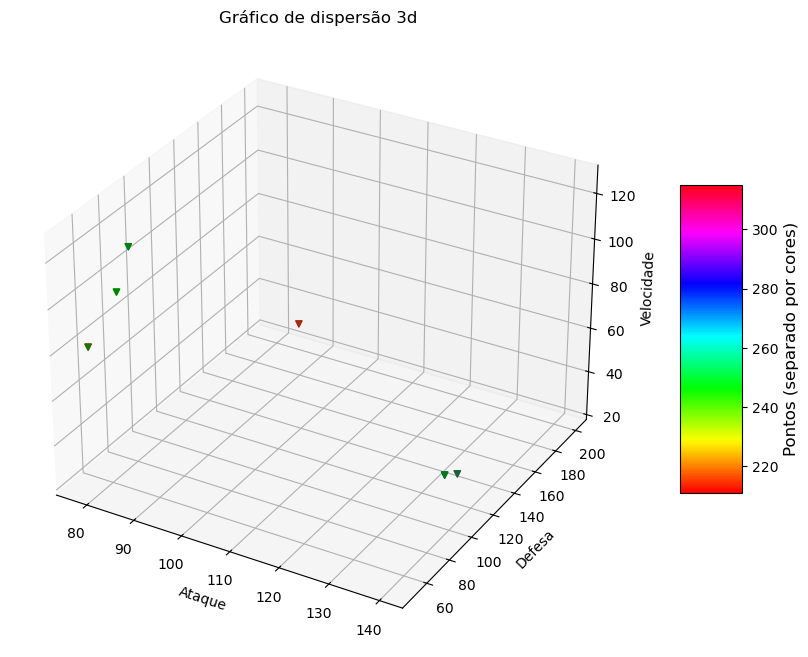

In [82]:
#Gráfico 3d:
fig = px.scatter_3d(selected_pokemons, x = 'attack', y = 'defense', z ='speed', #Alterar aqui (de selected_pokemons para current_team_pokemon).
                    color = 'generation', #Provavelmente vai ficar mais interessante se vcs trocarem o 'generation' por 'name'
                    labels = {'attack': 'Ataque', 'defense': 'Defesa', 'speed': 'Velocidade', 'generation': 'Geração'})

#Configuração do gráfico 3d 
ax.grid(b = 'True', color = 'blue', linestyle = '-.', linewidth = 0.3, alpha = 0.2)

#Paleta de cores
my_cmap = plt.get_cmap('hsv')

#Gráfico 3d
sctt = ax.scatter3D(current_team_pokemon['attack'], current_team_pokemon['defense'], current_team_pokemon['speed'], alpha = 1, c = (current_team_pokemon['attack'] + current_team_pokemon['defense'] + current_team_pokemon['speed']), cmap = my_cmap, marker ='v')

#Barra de cores e nomeação
cbar = fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
cbar.set_label('Pontos (separado por cores)', fontsize=12)

ax.scatter(current_team_pokemon['attack'], current_team_pokemon['defense'], current_team_pokemon['speed'], c = 'g', marker = 'v')
ax.set_title('Gráfico de dispersão 3d')
ax.set_xlabel('Ataque')
ax.set_ylabel('Defesa')
ax.set_zlabel('Velocidade')
plt.show()

###  Justifique a seleção dos 6 Pokémon, explicando como os critérios otimizados ajudaram a montar uma equipe equilibrada. 


#### O nosso time apresenta uma ampla variação de tipos, o que nos ajuda a enfrentar praticamente todos os tipos de oponentes. Além disso, notamos que todos os Pokémon do time possuem um nível de ataque acima de 100, evidenciando que temos um time forte no aspecto ofensivo. As defesas também são sólidas, com todos os membros apresentando valores superiores a 60, o que proporciona uma boa resistência em batalha.

#### Embora a velocidade não seja o ponto forte da equipe, contamos com Unfezant, que possui o maior nível de velocidade. Ele pode ser utilizado para neutralizar alvos distantes rapidamente, caso necessário. Por outro lado, Doublade, com uma defesa impressionante de 150, pode facilmente aguentar ataques, protegendo os membros mais frágeis do time.

#### Se optarmos por combinar os ataques, isso poderia resultar em um desempenho explosivo, dado o alto nível de ataque de nossa equipe. Os Pokémon mais robustos podem absorver o dano, enquanto os mais rápidos se encarregam de eliminar os adversários com agilidade.

## Discuta os trade-offs entre atributos ofensivos e defensivos, além das resistências e fraquezas de cada Pokémon contra outros tipos. 

### Excadrill (Terra/Aço)
#### HP: 110
#### Ataque: 135
#### Defesa: 60
#### Velocidade: 88
#### Bom Contra: Pedra (2.0), Fada (2.0), Elétrico (2.0)
#### Ruim Contra: Água (0.5), Terra (0.5)
### Unfezant (Normal/Voador)
#### HP: 80
#### Ataque: 115
#### Defesa: 80
#### Velocidade: 93
#### Bom Contra: Inseto (2.0), Grama (2.0), Luta (2.0)
#### Ruim Contra: Pedra (0.5), Fantasma (0.5)
### Kabutops (Pedra/Água)
#### HP: 60
#### Ataque: 115
#### Defesa: 100
#### Velocidade: 80
#### Bom Contra: Fogo (2.0), Voador (2.0), Terra (2.0)
#### Ruim Contra: Lutador (0.5), Elétrico (0.5)
### Galarian Rapidash (Psíquico/Fada)
#### HP: 65
#### Ataque: 100
#### Defesa: 70
#### Velocidade: 105
#### Bom Contra: Lutador (2.0), Dragão (2.0), Sombrio (2.0)
#### Ruim Contra: Aço (0.5), Venenoso (0.5)
### Luxray (Elétrico)
#### HP: 80
#### Ataque: 120
#### Defesa: 79
#### Velocidade: 70
#### Bom Contra: Água (2.0), Voador (2.0)
#### Ruim Contra: Terra (0.5), Elétrico (0.5)
### Doublade (Aço/Fantasma)
#### HP: 59
#### Ataque: 110
#### Defesa: 150
#### Velocidade: 35
#### Bom Contra: Fada (2.0), Gelo (2.0)
#### Ruim Contra: Lutador (0.5), Fada (0.5)

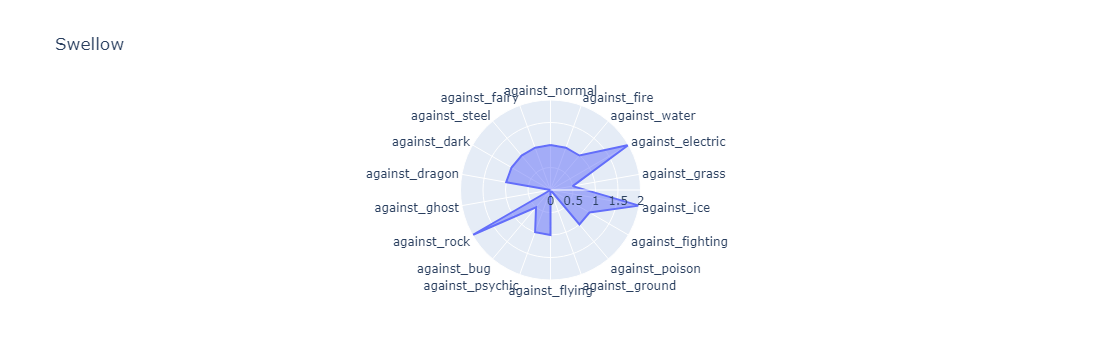

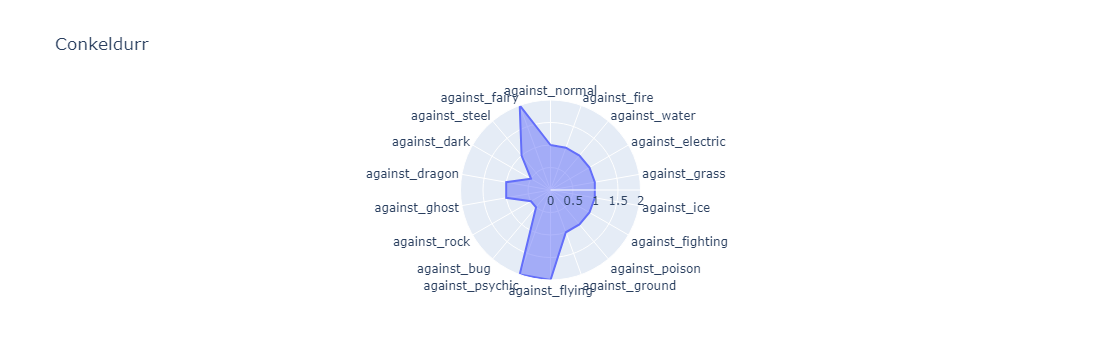

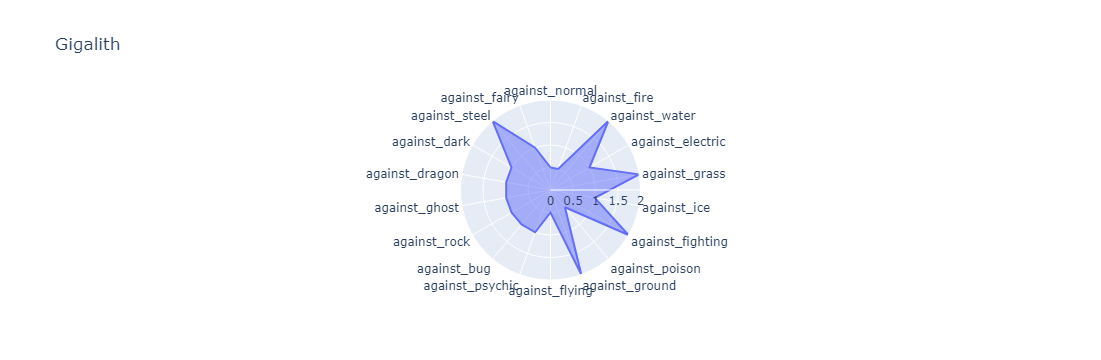

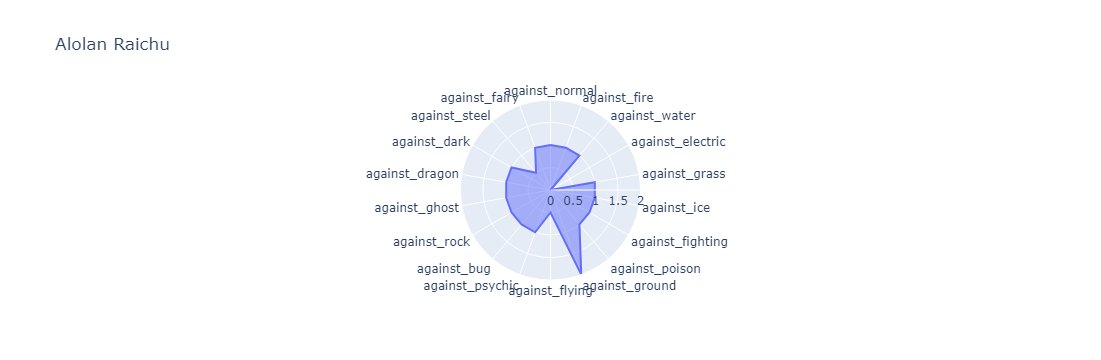

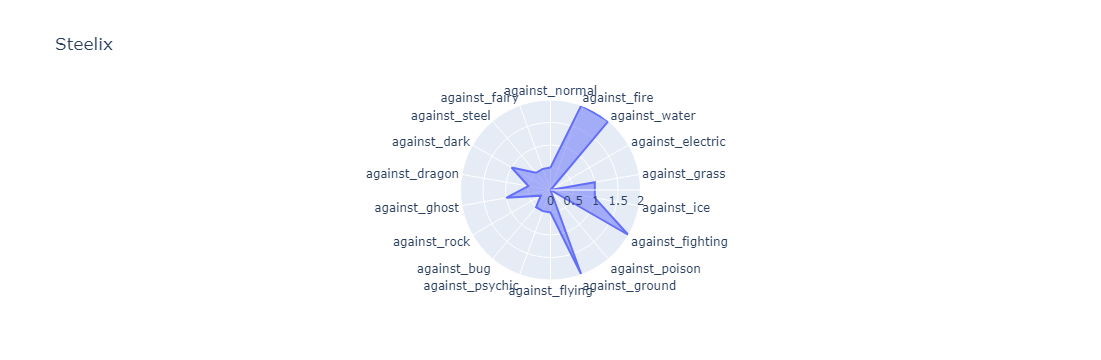

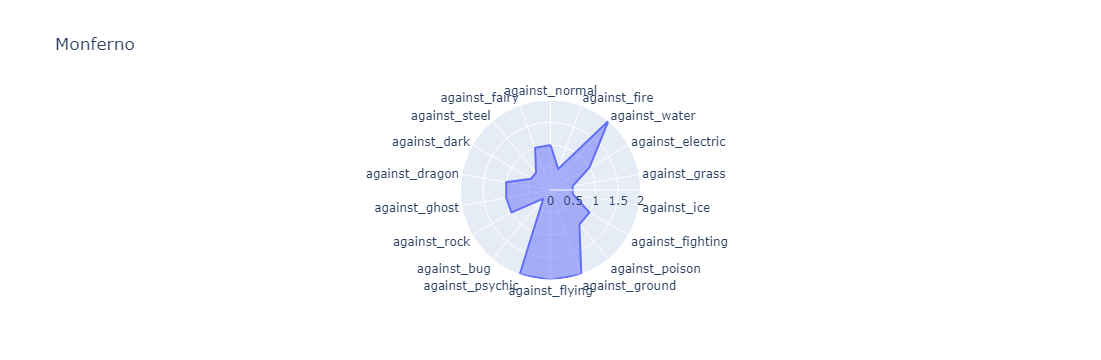

In [83]:
selected_pokemons_against = current_team_pokemon[['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fighting', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy']]

for index,value in enumerate(list(selected_pokemons_against.values)):
    fig = px.line_polar(selected_pokemons_against, r=value, theta=list(selected_pokemons_against.columns), line_close=True, title=current_team_pokemon['name'].iloc[index])
    fig.update_traces(fill='toself')  
    fig.show()
